# Treatement of the data for an entire exercise (Exo)

In this notebook we create a new class called Exo, which has two subclasses named AFC2 and AFC5.

## I. Importations of modules and python scripts

In [17]:
# We import python modules
# numpy : a mathematical function that is very useful!
import numpy as np
# Pyplot : very important tool if you want to create plots!
import matplotlib.pyplot as plt
# Parameters for pyplot and sizes of plots
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 15
# From the module utils we import the function create_dico
# which is helpful if you want to manage files
from utils import create_dico

# From the module analysis we import all (*)
from analysis import *

## II. Definition of a new class called Exo

A class is a set of functions.

The first one, called __init__ gathers the different functions that initialise the class: the path, the numeric keys, get_lines, clean_lines, and parse_lines. It also has one attribute, path, "self" being implicit.
    
The different functions that were called in __init__ are defined after.

The class Exo also has two subclasses that are 2AFC and 5AFC.

In [18]:
# We define a new class called "Exo"
class Exo:
    '''
    This is a description of the class, 
    If you have any problem with it
    you can always write help(Exo)
    '''
    # This is the initializing function of any exercise
    # It has only one argument, called "path"
    def __init__(self, path):
        # Here we define the shared attributes of all the exercises
        # They all have a path
        self.path = path
        # We can find several numeric keys in those exercises: 
        # Response time, number of mistakes, and repetitions
        self.numeric_keys = ['Response Time', 'NbErreurs', 'Repetitions']
        # All the exercises have lines that 
        # have to be taken, cleansed, and parsed
        self.get_lines()
        self.clean_lines()
        self.parse_lines()
        
    # Here we take the function get_lines that 
    # can be used on any AFC exercise. It gets the 
    # lines of the files and reads them, hence 'r'.
    def get_lines(self):
        f = open(self.path, 'r')
        # We take the lines
        self.lines = f.readlines()
        # We close the file
        f.close()
        
    # This function cleans the lines of the files
    def clean_lines(self):
        # We remove the \n that are then replaced
        # by a space. \n are line breaks.
        for i in range(len(self.lines)):
            self.lines[i] = self.lines[i].replace("\n", "")
        # If the line is empty, we delete it
        # We make a list which contains all the 
        # empty lines (= to_delete.append(i))
        to_delete = []
        for i in range(len(self.lines)):
            if len(self.lines[i]) == 0:
                to_delete.append(i)
        # then we delete (del) what has been
        # added in to_delete
        for i in to_delete:
            del self.lines[i]   
        
    # We parse the lines so as to assign attributes to lines    
    def parse_lines(self):
        attributs = []
        # We separate lines according to the tabulation
        for l in self.lines:
            attributs.append(l.split('\t'))
        # The date is the first line -> 0
        self.date = attributs[0]
        # The keys are the second line --> 1
        self.keys = np.array(attributs[1])
        # The data is to be found from the third
        # line (2) to the penultimate (-1)
        data = attributs[2:-1]
        # The last line is the number of mistakes
        # and repetitions --> stats_total
        self.stats_total = attributs[-1]
        columns = []
        for j, k in enumerate(self.keys):
            if k in self.numeric_keys:
                columns.append(np.array([float(data[i][j]) for i in range(len(data))]))
            else:
                columns.append(np.array([data[i][j] for i in range(len(data))]))
        # We have defined the content of the columns, now we have 
        # to indicate that it belongs to class Exo, hence 'self'
        self.columns = columns
        # Pour ne pas perdre ses clés !
        self.key_to_index = {}
        for i, k in enumerate(self.keys):
            self.key_to_index[k] = i
        
    def display(self):
        # on parcours les keys
        for i in range(self.keys.shape[0]):
            print(f'{self.keys[i]} {self.columns[i]}')

    
    def criteria_by_key(self, key, criteria, zeros=False):
        if key not in self.keys:
            raise Exception('Key not in my keys !')
        if criteria not in self.keys:
            raise Exception('Criteria not in my keys !')
            
        # We retrieve the index number of the key/column
        k_index = self.key_to_index[key]
        # We retrieve the index number of the criteria/column
        c_index = self.key_to_index[criteria]
        # We retrieve the columns
        key_column = self.columns[k_index]
        criteria_column = self.columns[c_index]
        
        dico = {}
        # For each key, we keep aside its 
        # value and we count the number of 
        # times we come across it.
        # dico[key] -> [valeur_critère, compteur d'occurences]
        for i, k in enumerate(key_column):
            value = criteria_column[i]
            if k not in dico.keys():
                dico[k] = [value, 1]
            else:
                dico[k] = [dico[k][0] + value, dico[k][1] + 1]
        # We return the dictionary
        return dico
    
    
        
# We define a specific type of exercise: the 2AFC
class AFC2(Exo):
    '''
    This is a description of the class, 
    If you have any problem with it
    you can always write help(AFC2)
    '''
    # This is a specific attribute of AFC2 which lists 
    # the keys that contain numeric quantities
    
    # This is the initializing function of the exercise
    # It has only one argument, called "path"
    def __init__(self, path):
        # Here, we define the attributes that are shared
        # by the AFC2 exercises, they all have a path
        super().__init__(path)

        
# We define a specific type of exercise: the 5AFC
class AFC5(Exo):
    '''
    This is a description of the class, 
    If you have any problem with it
    you can always write help(AFC5)
    '''
    # This is the initializing function of the exercise
    # It has only one argument, called "path"
    def __init__(self, path):
        # Here, we define the attributes that are shared
        # by the AFC2 exercises, they all have a path
        super().__init__(path)
     
    



In the following cell we define other functions to make plots, the first one makes a pie and the second an histogram.

In [19]:
 #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
        #ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        #        shadow=True, startangle=90)
def plot_chart(labels, values, title):
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()
    
def plot_hist(labels, values, title, xlabel, ylabel, xrotation=None, yrotation=None):
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xrotation:
        plt.tick_params(axis='x', rotation=xrotation)
    if yrotation:
        plt.tick_params(axis='y', rotation=yrotation)
    plt.show()

## III. Exploitation of the data using the previously defined functions

### 1. Definition of an example_directory and AFC2/AFC5_example for the applications of the functions

In [1]:
example_directory = "log_files/L1/Cassandra Amaro Ribeiro_1365824_assignsubmission_file_/logFiles/logFiles/"
AFC2_example = example_directory + "2AFC_a_Thu_Mar_11_18_13_17_2021.log"
AFC5_example = example_directory + "5AFC_1_Sat_Mar_20_21_10_31_2021.log"


### 2. Display of plots for the defined exercises

Sound File ['a_pat_H07' 'v_cut_H04' 'a_ban_H09' 'a_cap_F09' 'a_tat_H09' 'v_cup_F07'
 'v_mutt_F04' 'a_cad_F04' 'v_bun_F05' 'v_cut_F05' 'a_tat_H06' 'v_luck_F05'
 'v_puck_F06' 'a_pat_H08' 'a_lack_H09' 'v_cut_H05' 'a_cap_H06'
 'v_puck_H04' 'a_back_F05' 'v_tut_F05' 'v_putt_H05' 'v_tut_F04'
 'v_bun_F07' 'v_bun_F06' 'a_pack_H08' 'a_lack_F04' 'a_tat_H07' 'v_cup_F06'
 'v_luck_F06' 'a_ban_F05']
Stimulus ['pat' 'cut' 'ban' 'cap' 'tat' 'cup' 'mutt' 'cad' 'bun' 'cut' 'tat' 'luck'
 'puck' 'pat' 'lack' 'cut' 'cap' 'puck' 'back' 'tut' 'putt' 'tut' 'bun'
 'bun' 'pack' 'lack' 'tat' 'cup' 'luck' 'ban']
Vowel ['a' 'v' 'a' 'a' 'a' 'v' 'v' 'a' 'v' 'v' 'a' 'v' 'v' 'a' 'a' 'v' 'a' 'v'
 'a' 'v' 'v' 'v' 'v' 'v' 'a' 'a' 'a' 'v' 'v' 'a']
Response Time [1.39328504 1.21930075 1.27014208 1.73497415 2.23553705 1.43859887
 1.6671319  2.02193093 1.90444207 1.84750414 2.9439621  1.33944392
 1.691921   1.6721251  1.20243311 1.10895991 0.49098611 1.51972008
 1.66735721 0.51189089 2.18864799 0.72322679 1.33309889 1.0411882

ValueError: could not convert string to float: 'v'

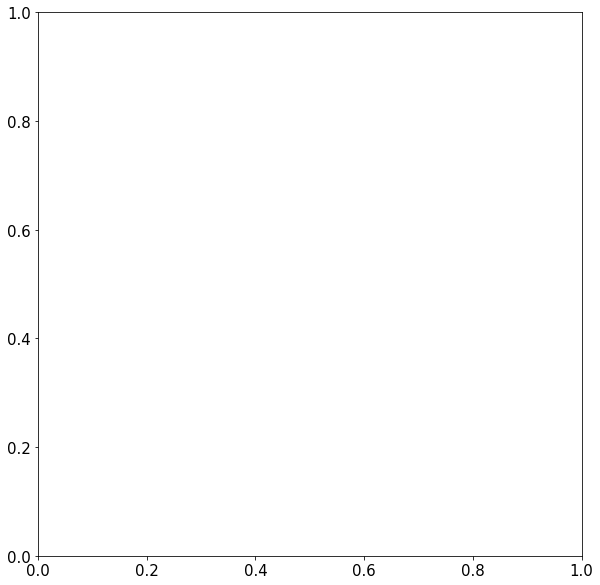

In [21]:
exo = AFC2(AFC2_example)
exo.display()
#labels, values = 
label, values = exo.criteria_by_key("Vowel", "Repetitions")
#values = exo.criteria_by_key("Repetitions")

plot_chart(label, values, "Number of repetitions per vowel")

plot_hist(label, values, "Number of repetitions per vowel", "Vowel", "Repetitions", 0)